In [117]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
scenario = "testing"

In [118]:
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow" )
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_h2 = os.path.join(path_to_results, "amiris-config", "data","LS_hydrogen.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_electricity_prices = os.path.join(path_to_results, "output","raw","EnergyExchangeMulti.csv" )
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS_Results", scenario )
path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
if not os.path.exists(path_to_plots):
    os.makedirs(path_to_plots)
#-----------------------------------------------------------------------------
elec_prices_data = pd.read_csv(path_to_electricity_prices, sep=";")  
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
h2_high_data = pd.read_csv(path_to_h2, sep=";", header=None) 
load_data = pd.read_csv(path_to_load, sep=";", header=None) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
renewables_data = pd.read_excel(path_to_structure, sheet_name='renewables', index_col=0)
electrolysers_data = pd.read_excel(path_to_structure, sheet_name='electrolysers', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)
load_shedders_data = pd.read_excel(path_to_structure, sheet_name='load_shedding')


In [119]:
loads = pd.DataFrame()
for rownum,(indx,i)  in enumerate(load_shedders_data["TimeSeries"].iteritems()): 

    if i in ["amiris-config/data/LS_hydrogen.csv", "amiris-config/data/LS_hydrogen_high.csv"]:
        pass
    else:
        print(i)
        path_to_load = os.path.join(path_to_results, i)
        load = pd.read_csv(path_to_load, sep=";", header=None)
        loads[rownum] = load[1]
load_data = loads.sum(axis=1) 
load_generation = pd.concat([generation_data, elec_prices_data,
                      load_data],   axis=1)

amiris-config/data/load.csv
amiris-config/data/LS_high.csv
amiris-config/data/LS_low.csv
amiris-config/data/LS_mid.csv


In [120]:
load_generation['group'] = (elec_prices_data.index // 7)
grouped = load_generation.groupby(['group']).sum()
grouped.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding,electrolysis_power_consumption,electrolysis_hydrogen_generation,unit_3300000,unit_25000000,unit_50000000,unit_150000000,unit_400000000,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR,0
group,,,,,,,,,,,,,,,,,,,
0,216472.755369,39647.601,0,0,0,250172.490383,82425.000000,82425.000000,250172.490383,0.0,0.0,0.0,0.0,7,6622635621,256120.356369,231.000000,922776.215219,136370.846751
1,270274.093927,39647.601,0,0,0,227029.179492,82425.000000,82425.000000,227029.179492,0.0,0.0,0.0,0.0,7,6622812021,309921.694927,231.000000,989516.809727,167028.874419
2,217546.153347,39647.601,0,0,0,277973.308067,70304.942959,70304.942959,277973.308067,0.0,0.0,0.0,0.0,7,6622988421,257193.754347,293.321011,912624.992911,177365.119455
3,218290.782567,39647.601,0,0,0,248118.920551,81710.784143,81710.784143,248118.920551,0.0,0.0,0.0,0.0,7,6623164821,257938.383567,246.580253,919934.904851,136849.519975
4,305402.375055,39647.601,0,0,0,200081.758018,82425.000000,82425.000000,200081.758018,0.0,0.0,0.0,0.0,7,6623341221,345049.976055,231.000000,955326.224537,175209.734073


In [121]:
load_generation['group'] = (load_generation.index // (7*24))
grouped = load_generation.groupby(['group']).sum()
grouped_filtered = grouped.iloc[45:50]


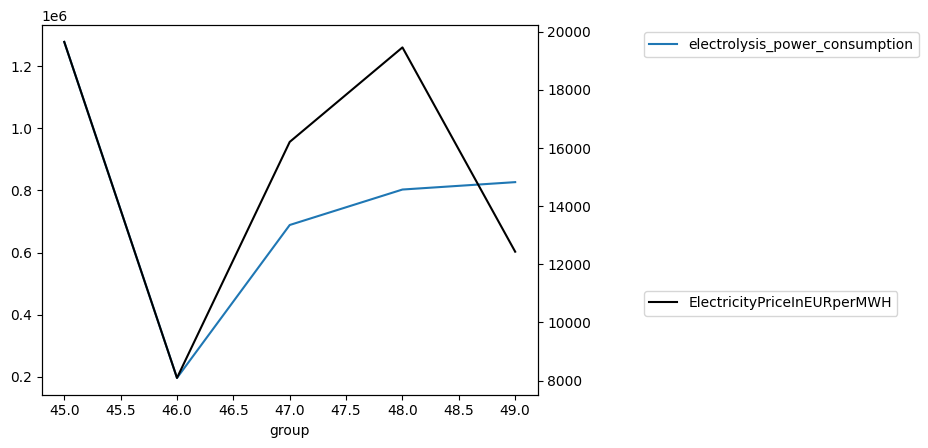

In [122]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
grouped_filtered['electrolysis_power_consumption'].plot( ax=ax1)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1))
ax2.plot(grouped_filtered['ElectricityPriceInEURperMWH'], color = "black")
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))


'\nscarcity hour happened even if industry load was curtailed on the specific scarcity hour, and all load was shedded\n\n'

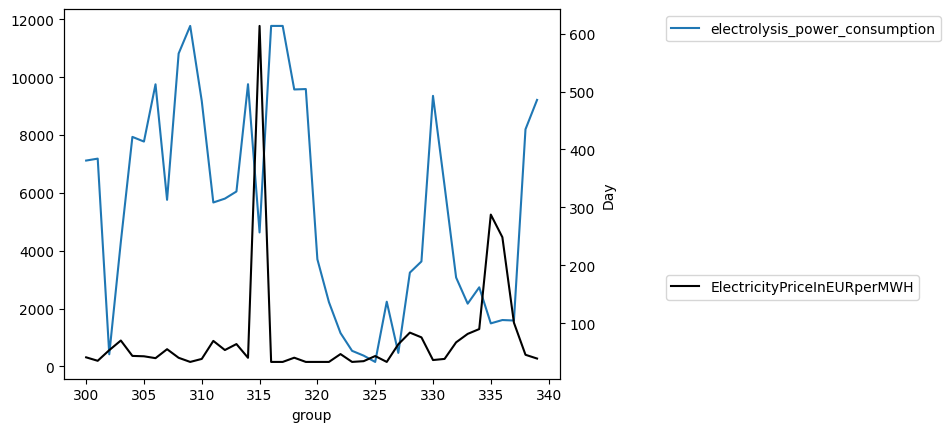

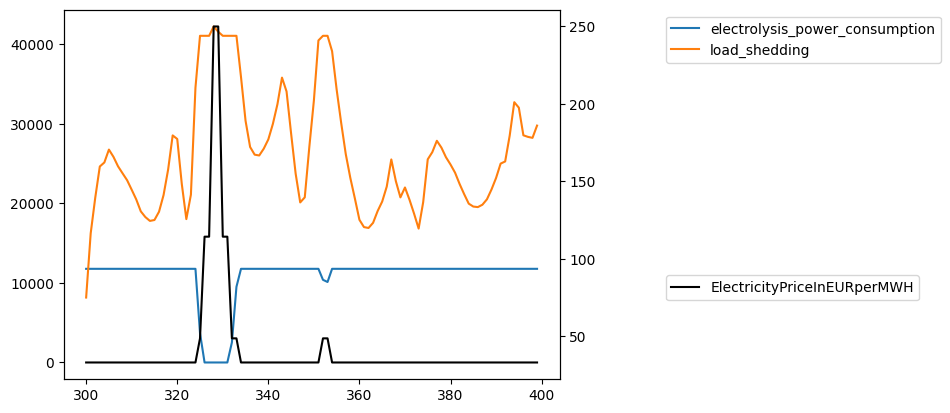

In [123]:

all2 = load_generation
all2['group'] = (load_generation.index // 24)
grouped = all2.groupby(['group']).mean()
grouped_filtered = grouped[300:340]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
grouped_filtered['electrolysis_power_consumption'].plot( ax=ax1)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1))
ax2.plot(grouped_filtered['ElectricityPriceInEURperMWH'], color = "black")
ax2.set_ylabel("Day")
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))


a = 300
filtered = load_generation[a : a+ 100]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
filtered['electrolysis_power_consumption'].plot( ax=ax1)
filtered['load_shedding'].plot( ax=ax1)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1))
ax2.plot(filtered['ElectricityPriceInEURperMWH'], color = "black")
#ax2.set_ylim(-1000, 4100)
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))

"""
scarcity hour happened even if industry load was curtailed on the specific scarcity hour, and all load was shedded

"""

In [164]:
from statsmodels.tsa.seasonal import seasonal_decompose
analysis = load_generation[['electrolysis_power_consumption']]
analysis['hourly_datetime'] = pd.date_range(start='2023-01-01 00:00:00', periods=8760, freq='H')
analysis['ElectricityPriceInEURperMWH'] = load_generation['ElectricityPriceInEURperMWH'].values
analysis['load_inflexible'] = load_data.values

analysis.set_index("hourly_datetime", inplace = True)
analysis.head()

C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_14876\956134557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['hourly_datetime'] = pd.date_range(start='2023-01-01 00:00:00', periods=8760, freq='H')
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_14876\956134557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['ElectricityPriceInEURperMWH'] = load_generation['ElectricityPriceInEURperMWH'].values
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_14876\956134557.py:5: Se

,electrolysis_power_consumption,ElectricityPriceInEURperMWH,load_inflexible
hourly_datetime,,,
2023-01-01 00:00:00,11775.0,33.0,19065.987673
2023-01-01 01:00:00,11775.0,33.0,18931.976186
2023-01-01 02:00:00,11775.0,33.0,18615.022706
2023-01-01 03:00:00,11775.0,33.0,18547.283698
2023-01-01 04:00:00,11775.0,33.0,18993.036132


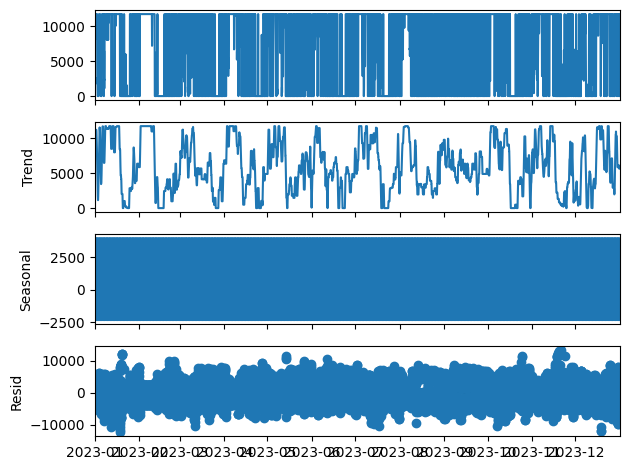

In [165]:
decompose_result_mult = seasonal_decompose(analysis[['electrolysis_power_consumption']], model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [166]:
# weekly = analysis.resample('W').sum()
# weekly = pd.concat([daily] * 2, ignore_index=True)
# start_date = '2023-01-01'
# end_date = '2024-12-31'
# weekly_index = pd.date_range(start=start_date, end=end_date, freq='W')

# # Assign the weekly time series to the DataFrame
# weekly['weekly_datetime'] = weekly_index

In [167]:
daily = analysis.resample('D').sum()
testing = daily

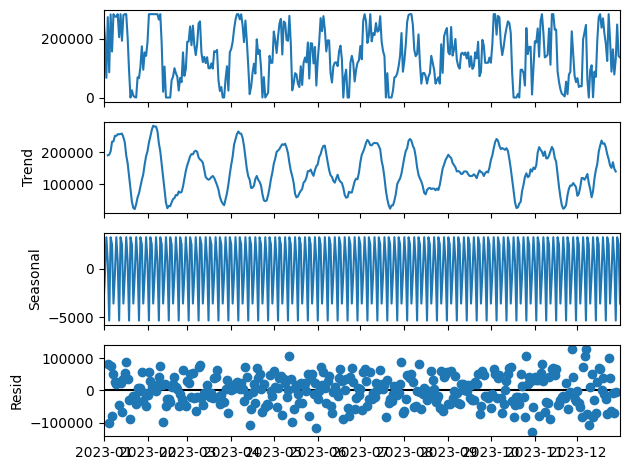

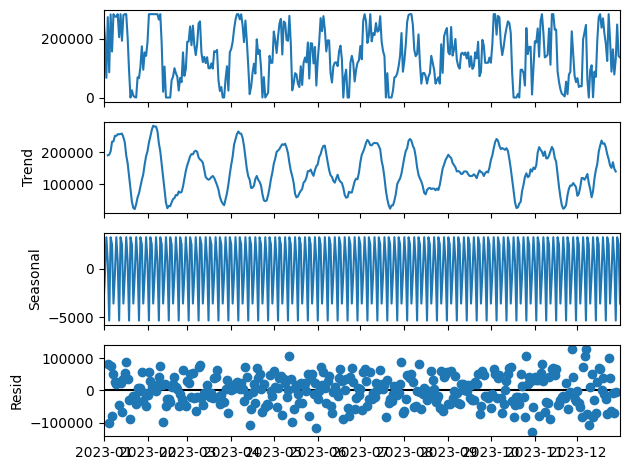

In [168]:
decompose_result_mult = seasonal_decompose(testing[['electrolysis_power_consumption']], model="additive")
trend_electrolysis = decompose_result_mult.trend
seasonal_electrolysis = decompose_result_mult.seasonal
residual_electrolysis = decompose_result_mult.resid
decompose_result_mult.plot()

'\nThere production was always high at the beginning of the month. \n'

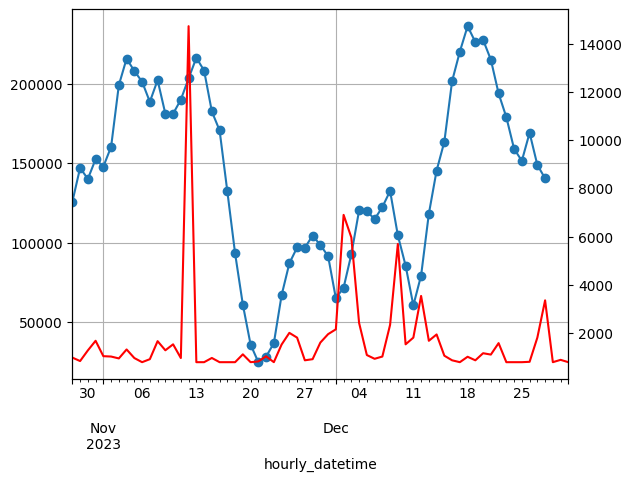

In [169]:

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
daily['ElectricityPriceInEURperMWH'][300:365].plot( ax=ax2, color='red')
trend_electrolysis[300:365].plot(grid=True,  ax=ax1, marker='o')
"""
There production was always high at the beginning of the month. 
"""

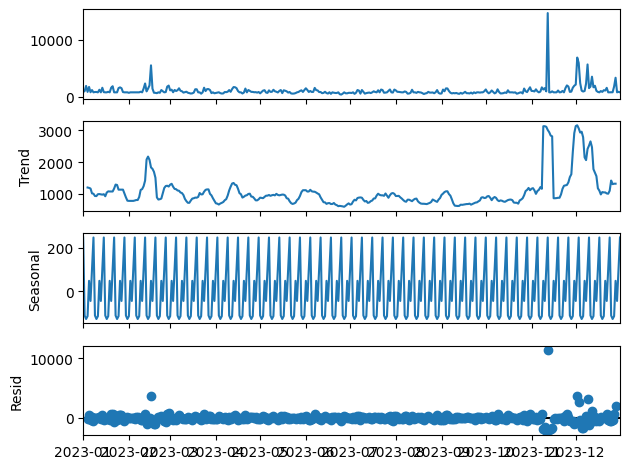

In [170]:

decompose_result_mult = seasonal_decompose(testing[['ElectricityPriceInEURperMWH']], model="additive")
trend_prices = decompose_result_mult.trend
seasonal_prices = decompose_result_mult.seasonal
residual_prices = decompose_result_mult.resid
decompose_result_mult.plot();

<AxesSubplot:xlabel='hourly_datetime'>

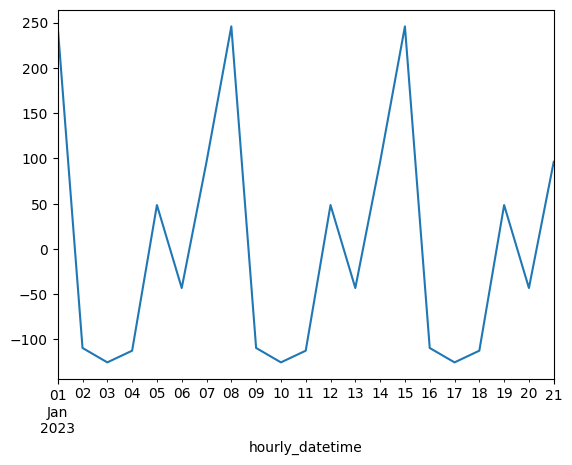

In [171]:
seasonal_prices[0:21].plot()

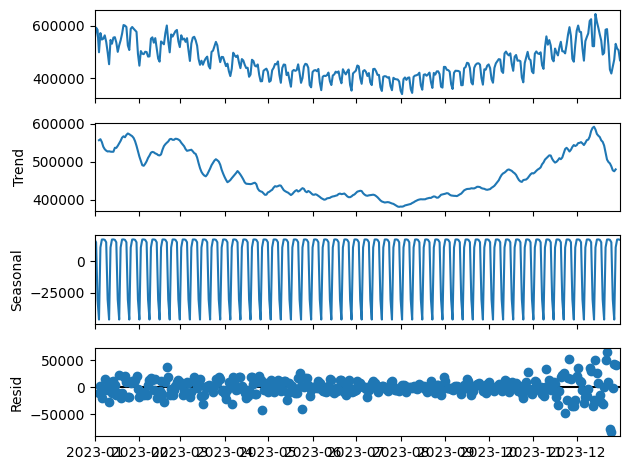

In [172]:
decompose_result_mult = seasonal_decompose(testing[['load_inflexible']], model="additive")
trend_load = decompose_result_mult.trend
seasonal_load = decompose_result_mult.seasonal
residual_load = decompose_result_mult.resid
decompose_result_mult.plot();

'\nThere was a weekly trend where the consumtion was decrease very much on the last day of the week. \nIs this due to scheduling?\nalso electrolysis is reduced in last days of the month\n\n'

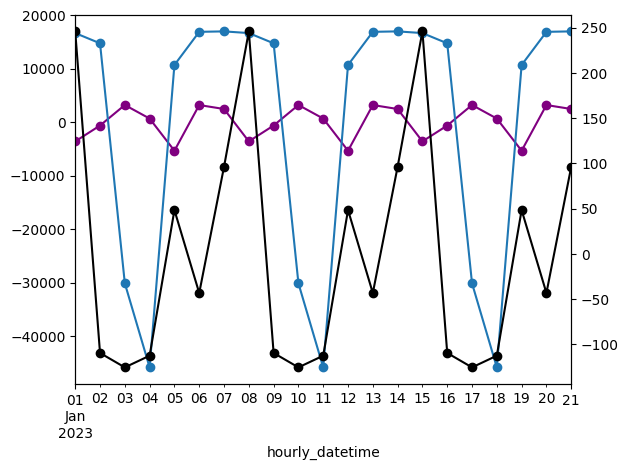

In [173]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#daily['ElectricityPriceInEURperMWH'][0:14].plot( ax=ax2, color='red')
fromhour = 0
untilhour = 21
a = seasonal_electrolysis[fromhour:untilhour].plot(marker='o', ax=ax1, color= "purple")
ba = seasonal_prices[fromhour:untilhour].plot(marker='o',  ax=ax2, color= "black")
b = seasonal_load[fromhour:untilhour].plot(marker='o',  ax=ax1, color= "blue")
"""
There was a weekly trend where the consumtion was decrease very much on the last day of the week. 
The electrolysis raises. 
At the middle of the wek electricity prices decrease and electrolysis increase. 
Why would electricity prices decrease in the middle of the week?
"""